In [44]:
URL = 'https://uk-air.defra.gov.uk/data_files/site_data/REA5_2020.csv'

In [45]:
from urllib.request import urlretrieve
urlretrieve(URL,'Reading_2020.csv')

('Reading_2020.csv', <http.client.HTTPMessage at 0x192629ce5c8>)

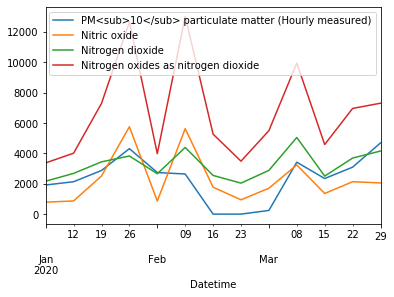

In [46]:
import pandas as pd
import datetime
data = pd.read_csv('Reading_2020.csv',skiprows=4)
data['time'] = data['time'].replace({'24:00':'00:00'})
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['time'],dayfirst=True)
for x in data.index:
    if data.iloc[x]['Datetime'].strftime("%H:%M") == "00:00":
        y = data.iloc[x]['Datetime'] + datetime.timedelta(days=1)
        data.at[x,'Datetime'] = y
data.set_index('Datetime', inplace=True)
data.resample('W').sum().plot()